In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score
import pickle

# Data Understanding

In [2]:
# Reading data
df = pd.read_csv(r'C:\Users\FILI DANI\Downloads\Data for Task 1.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Reading data types
for col in df.columns:
    print(col,df[col].dtype)

id int64
diagnosis object
radius_mean float64
texture_mean float64
perimeter_mean float64
area_mean float64
smoothness_mean float64
compactness_mean float64
concavity_mean float64
concave points_mean float64
symmetry_mean float64
fractal_dimension_mean float64
radius_se float64
texture_se float64
perimeter_se float64
area_se float64
smoothness_se float64
compactness_se float64
concavity_se float64
concave points_se float64
symmetry_se float64
fractal_dimension_se float64
radius_worst float64
texture_worst float64
perimeter_worst float64
area_worst float64
smoothness_worst float64
compactness_worst float64
concavity_worst float64
concave points_worst float64
symmetry_worst float64
fractal_dimension_worst float64
Unnamed: 32 float64


In [4]:
# Describing dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
for col in df.columns:
    if df[col].dtype != type(object):
        print(f'{col}   median:{df[col].median()}')
df['diagnosis'].value_counts()

id   median:906024.0
radius_mean   median:13.37
texture_mean   median:18.84
perimeter_mean   median:86.24
area_mean   median:551.1
smoothness_mean   median:0.09587
compactness_mean   median:0.09263
concavity_mean   median:0.06154
concave points_mean   median:0.0335
symmetry_mean   median:0.1792
fractal_dimension_mean   median:0.06154
radius_se   median:0.3242
texture_se   median:1.108
perimeter_se   median:2.287
area_se   median:24.53
smoothness_se   median:0.00638
compactness_se   median:0.02045
concavity_se   median:0.02589
concave points_se   median:0.01093
symmetry_se   median:0.01873
fractal_dimension_se   median:0.003187
radius_worst   median:14.97
texture_worst   median:25.41
perimeter_worst   median:97.66
area_worst   median:686.5
smoothness_worst   median:0.1313
compactness_worst   median:0.2119
concavity_worst   median:0.2267
concave points_worst   median:0.09993
symmetry_worst   median:0.2822
fractal_dimension_worst   median:0.08004
Unnamed: 32   median:nan


B    357
M    212
Name: diagnosis, dtype: int64

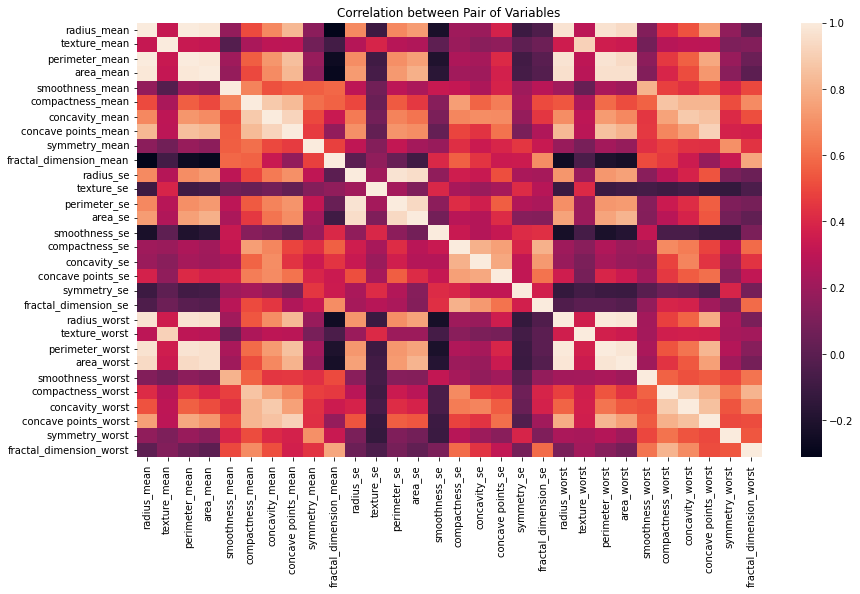

In [6]:
# Correlation
fig , ax = plt.subplots(figsize=(14,8))
sns.heatmap(df.iloc[:,1:32].corr(),ax=ax)
ax.set_title('Correlation between Pair of Variables')
plt.show()

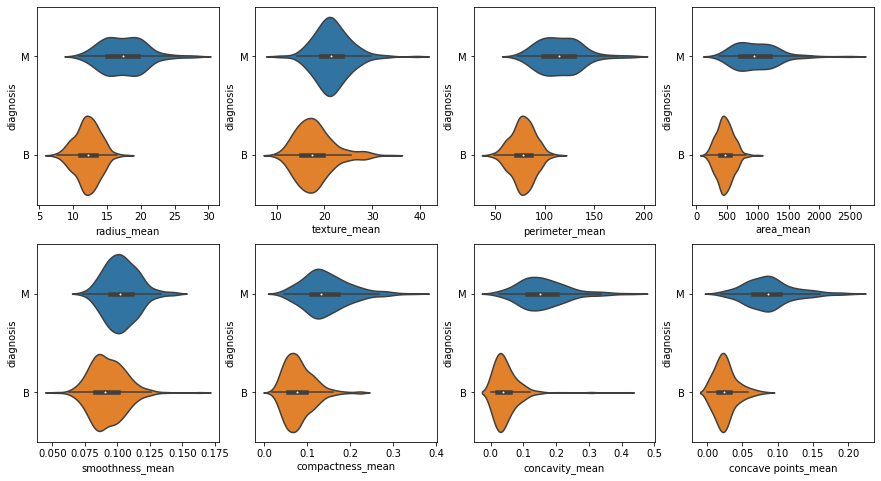

In [7]:
# Grouped distributions
fig , ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,figsize=(15,8))
sns.violinplot(data=df,x='radius_mean',y='diagnosis',ax=ax1)
sns.violinplot(data=df,x='texture_mean',y='diagnosis',ax=ax2)
sns.violinplot(data=df,x='perimeter_mean',y='diagnosis',ax=ax3)
sns.violinplot(data=df,x='area_mean',y='diagnosis',ax=ax4)
sns.violinplot(data=df,x='smoothness_mean',y='diagnosis',ax=ax5)
sns.violinplot(data=df,x='compactness_mean',y='diagnosis',ax=ax6)
sns.violinplot(data=df,x='concavity_mean',y='diagnosis',ax=ax7)
sns.violinplot(data=df,x='concave points_mean',y='diagnosis',ax=ax8)
plt.show()

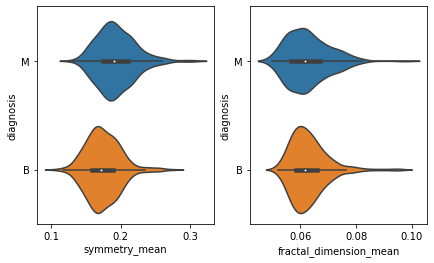

In [8]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(7,4))
sns.violinplot(data=df,x='symmetry_mean',y='diagnosis',ax=ax1)
sns.violinplot(data=df,x='fractal_dimension_mean',y='diagnosis',ax=ax2)
plt.show()

# Data Processing

In [9]:
# Checking for missing data
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
# Removing unnecessary columns
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df_copy = df.copy()

In [11]:
# Encoding and scaling of dataset
for col in df.columns:
    if df[col].dtype == type(object):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        rs = RobustScaler()
        df[col] = rs.fit_transform(df[[col]])

# Modeling

In [12]:
# Design for modeling
y = df['diagnosis']
x = df.iloc[:,1:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
# Sequential Forward Feature Selection for Logistic Regression
model = LogisticRegression()
model.fit(x_train,y_train)
sfs_lr = SFS(estimator=model,k_features='best',forward=True,scoring='f1',cv=5)
sfs_lr.fit(x_train,y_train)
sfs_lr_features = list(sfs_lr.k_feature_names_)
sfs_lr_score = sfs_lr.k_score_
print(f'The best features for SFS Logsitic Regression are {sfs_lr_features} and the score is {sfs_lr_score}')

The best features for SFS Logsitic Regression are ['compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'symmetry_se', 'texture_worst', 'area_worst', 'compactness_worst', 'concavity_worst'] and the score is 0.9761154700804278


In [14]:
# Logistic Regression implementation
lr_model = LogisticRegression()
lr_model.fit(x_train[sfs_lr_features],y_train)
lr_training_score = f1_score(y_train,lr_model.predict(x_train[sfs_lr_features]))
lr_testing_score = f1_score(y_test,lr_model.predict(x_test[sfs_lr_features]))
print(f'The training f1 score for Logistic Regression is {lr_training_score}')
print(f'The testing f1 score for Logistic Regression is {lr_testing_score}')

The training f1 score for Logistic Regression is 0.9761904761904762
The testing f1 score for Logistic Regression is 0.9647058823529412


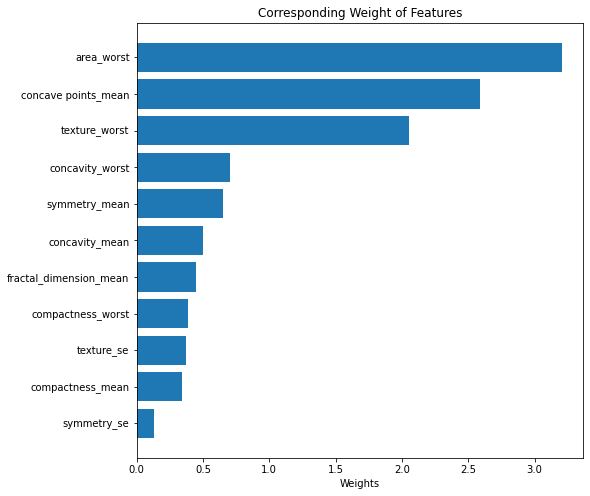

In [15]:
# Analyzing feature importance for Logistic Regression
lr_weights = []
lr_coef = lr_model.coef_.flatten().tolist()
for weight in lr_coef:
    lr_weights.append(abs(weight))
lr_features = lr_model.feature_names_in_.flatten().tolist()
sorted_data = sorted(zip(lr_weights, lr_features))
lr_weights_sorted, lr_features_sorted = zip(*sorted_data)

# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(lr_features_sorted, lr_weights_sorted)
ax.set_xlabel('Weights')
ax.set_title('Corresponding Weight of Features')
plt.show()

In [16]:
# Sequential Forward Feature Selection for Support Vector Machines
model = SVC(kernel='linear')
model.fit(x_train,y_train)
sfs_svm = SFS(estimator=model,k_features='best',forward=True,scoring='f1',cv=5)
sfs_svm.fit(x_train,y_train)
sfs_svm_features = list(sfs_svm.k_feature_names_)
sfs_svm_score = sfs_svm.k_score_
print(f'The best features for SFS Support Vector Machine are {sfs_svm_features} and the score is {sfs_svm_score}')

The best features for SFS Support Vector Machine are ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean', 'texture_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst'] and the score is 0.982085619334159


In [17]:
# Implementation of Support Vector Machines
svm_model = SVC(kernel='linear')
svm_model.fit(x_train[sfs_svm_features],y_train)
svm_training_score = f1_score(y_train,svm_model.predict(x_train[sfs_svm_features]))
svm_testing_score = f1_score(y_test,svm_model.predict(x_test[sfs_svm_features]))
print(f'The training f1 score for Support Vector Machine is {svm_training_score}')
print(f'The testing f1 score for Support Vector Machine is {svm_testing_score}')

The training f1 score for Support Vector Machine is 0.9761904761904762
The testing f1 score for Support Vector Machine is 0.9647058823529412


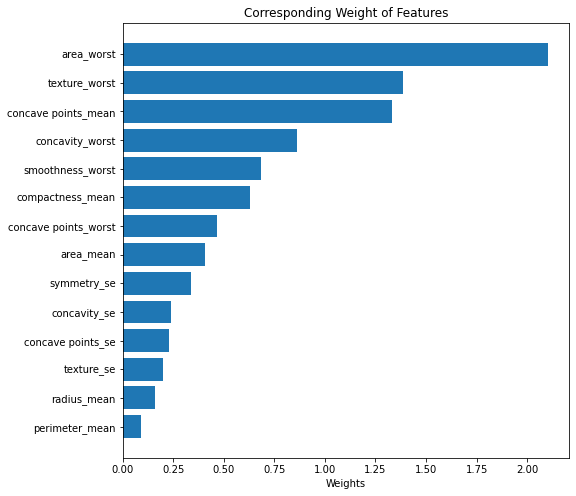

In [18]:
# Analyzing feature importance for Support Vector Machines
svm_weights = []
svm_coef = svm_model.coef_.flatten().tolist()
for weight in svm_coef:
    svm_weights.append(abs(weight))
svm_features = svm_model.feature_names_in_.flatten().tolist()
svm_sorted_data = sorted(zip(svm_weights, svm_features))
svm_weights_sorted, svm_features_sorted = zip(*svm_sorted_data)

# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(svm_features_sorted, svm_weights_sorted)
ax.set_xlabel('Weights')
ax.set_title('Corresponding Weight of Features')
plt.show()

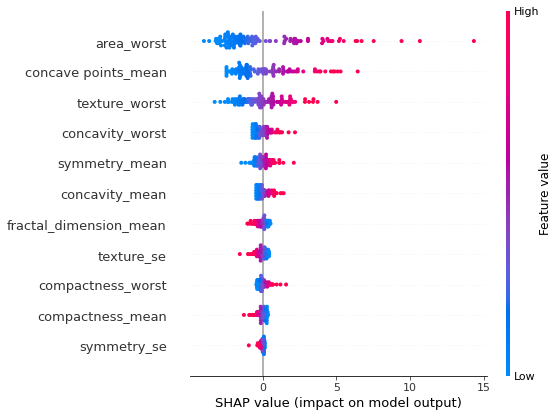

In [19]:
# Implementation of SHAP values
explainer = shap.Explainer(lr_model,x_test[sfs_lr_features])
shap_values = explainer(x_test[sfs_lr_features])
shap.summary_plot(shap_values,x_test[sfs_lr_features],feature_names=x_test[sfs_lr_features].columns)

# Evaluation

In [20]:
# Confusion Matrix
print(confusion_matrix(y_test,svm_model.predict(x_test[sfs_svm_features]),labels=[1,0]))

[[41  2]
 [ 1 70]]


In [21]:
# Precision 
print(precision_score(y_test,lr_model.predict(x_test[sfs_lr_features]),labels=[1,0]))

0.9761904761904762


In [22]:
# Recall
print(recall_score(y_test,lr_model.predict(x_test[sfs_lr_features]),labels=[1,0]))

0.9534883720930233


# Saving Model

In [23]:
new_df = df_copy.loc[:,['diagnosis', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                  'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'symmetry_se',
                  'texture_worst', 'area_worst', 'compactness_worst', 'concavity_worst']]

y = new_df.iloc[:, 0]
x = new_df.iloc[:, 1:]

y = LabelEncoder().fit_transform(y)
scaler = RobustScaler().fit(x)
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Creating and fitting the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [28]:
save_model = pickle.dump(model,open('model.pkl','wb'))
save_scaler = pickle.dump(scaler,open('scaler.pkl','wb'))